<a href="https://colab.research.google.com/github/itzelmor02/Aprendizaje-de-Patrones-IMG/blob/main/Practica07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando K-means y el archivo wine.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar los datos del archivo CSV
datos = pd.read_csv('wine.csv')
X = datos.drop('target', axis=1)  # Características
y = datos['target']  # Etiquetas de clase

In [ ]:
# Calcular el WCSS para diferentes valores de k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

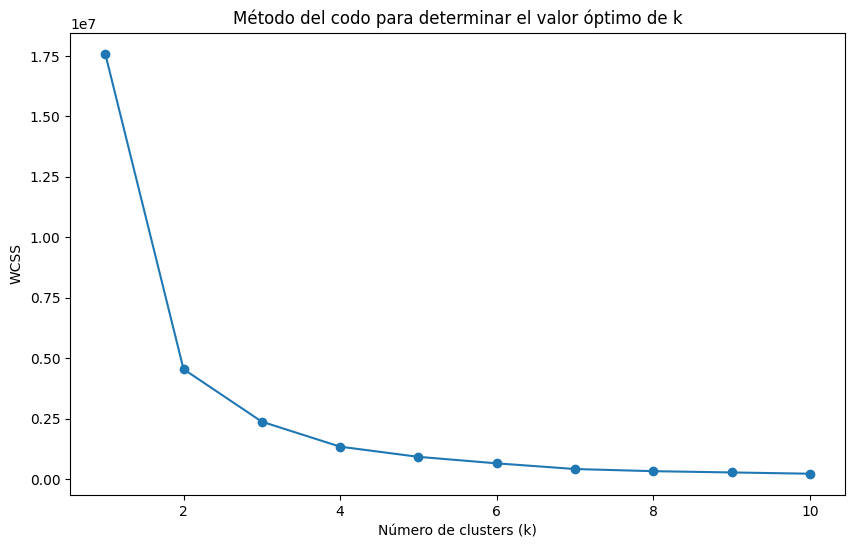

In [ ]:
# Gráfica de codo para determinar el valor óptimo de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del codo para determinar el valor óptimo de k')
plt.show()

In [ ]:
# Determinar el valor óptimo de k (aquí se asume k=3 según la gráfica de codo)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(X)

In [ ]:
# Obtener las diferentes clases de vinos
clases_vinos = set(etiquetas)
print(f"Clases de vinos: {clases_vinos}")

Clases de vinos: {0, 1, 2}


# Usando el archivo clusters.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
# Cargar el archivo CSV
data = pd.read_csv("clusters.csv")

In [3]:
# Extraer características
X = data.iloc[:, 1:].values

In [4]:
# Definir el número de clusters
num_clusters = 3

# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=num_clusters)
hc_clusters = hc.fit_predict(X)

# K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_clusters = gmm.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
# Funciones de evaluación
def evaluate_clusters(X, clusters, method):
    silhouette = silhouette_score(X, clusters)
    db_score = davies_bouldin_score(X, clusters)
    ch_score = calinski_harabasz_score(X, clusters)
    print(f"Evaluación de {method}:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Score: {db_score}")
    print(f"Calinski-Harabasz Score: {ch_score}")
    print("\n")

# Evaluación de los resultados
evaluate_clusters(X, hc_clusters, "Hierarchical Clustering")
evaluate_clusters(X, kmeans_clusters, "K-Means")
evaluate_clusters(X, dbscan_clusters, "DBSCAN")
evaluate_clusters(X, gmm_clusters, "Gaussian Mixture Model")


Evaluación de Hierarchical Clustering:
Silhouette Score: 0.6420901996459187
Davies-Bouldin Score: 0.45699716603617696
Calinski-Harabasz Score: 17468.547098009636


Evaluación de K-Means:
Silhouette Score: 0.6465070352094576
Davies-Bouldin Score: 0.46620684292934883
Calinski-Harabasz Score: 17668.068612749452


Evaluación de DBSCAN:
Silhouette Score: 0.31247727934027064
Davies-Bouldin Score: 0.49202572439855596
Calinski-Harabasz Score: 22.187673097607203


Evaluación de Gaussian Mixture Model:
Silhouette Score: 0.6390575000142238
Davies-Bouldin Score: 0.4444949785360621
Calinski-Harabasz Score: 17092.74604440664




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


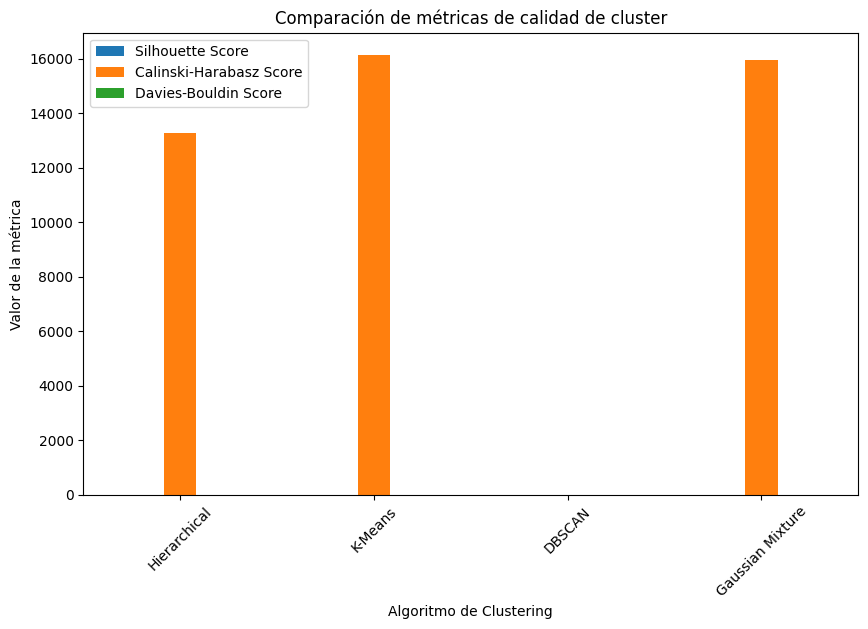

In [6]:
# Función para evaluar los clusters
def evaluate_clusters(X, cluster_labels):
    silhouette = silhouette_score(X, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_scores = evaluate_clusters(X, hierarchical_labels)

# K-Means
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)
kmeans_scores = evaluate_clusters(X, kmeans_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_scores = evaluate_clusters(X, dbscan_labels)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)
gmm_scores = evaluate_clusters(X, gmm_labels)

# Almacenar los resultados en un DataFrame
results = pd.DataFrame({
    'Silhouette Score': [hierarchical_scores[0], kmeans_scores[0], dbscan_scores[0], gmm_scores[0]],
    'Calinski-Harabasz Score': [hierarchical_scores[1], kmeans_scores[1], dbscan_scores[1], gmm_scores[1]],
    'Davies-Bouldin Score': [hierarchical_scores[2], kmeans_scores[2], dbscan_scores[2], gmm_scores[2]]
}, index=['Hierarchical', 'K-Means', 'DBSCAN', 'Gaussian Mixture'])

# Graficar los resultados
results.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de métricas de calidad de cluster')
plt.xlabel('Algoritmo de Clustering')
plt.ylabel('Valor de la métrica')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

Gráficamente podríamos ver que el que clasifica más datos del conjunto es K-Means y apoyándonos en los números anteriores vemos que K-Means tiene:


*   El mayor Silhouette Score (0.6465), lo que indica que los datos están bien agrupados dentro de sus respectivos clusters.
*   El menor Davies-Bouldin Score (0.4662), lo que sugiere que los clusters están bien separados y compactos.
*   El mayor Calinski-Harabasz Score (17668.07), que mide la relación entre la disimilitud intra-cluster e inter-cluster, siendo un valor más alto mejor.

Y también después de varias pruebas, el número de clústers con los que obtuvimos el mejor resultado en K-Means fueron **3**

